## Let's get started!

- <font color=lightgrey>Understanding AI, ML and DL concepts</font>
<br><br>
- Understanding fundamentals of DL algorithm
  - Regression and classification
  - Neural networks and deep learning
<br><br>
- Only <font color=blue>**pure Python**</font> without any AI library
  - Looking into the inside of <font color=red>**core**</font> DL algorithm

# <center>CHAP 3. 다층 신경망의 학습</center>

### 다층 신경망...

- 선형 분리 불가능이라는 단층 신경망의 근본적인 한계로<br>
  신경망이 다층 구조로 발전한 것은 필연적인 일이었음

- 신경망에 은닉층 하나 추가하는 데 무려 30여 년이 걸림

- 다층 신경망의 학습 규칙을 찾아내지 못했기 때문

- 학습은 신경망에 정보를 저장할 수 있는 유일한 방법으로<br>
  학습이 안되는 신경망은 아무 쓸모가 없음

■ 기존의 델타 규칙...

- 델타 규칙으로는 다층 신경망을 학습시킬 수 없음

- 오차가 필요한데, 은닉층에서는 오차가 정의조차 안 됨
  - 출력층에서는 정답과 출력의 차이로 정의되는데,
  - 은닉층에는 정답이 주어지지 않아서...

- 관건은 '은닉층의 오차를 어떻게 정의할 것인가?'

- 이게 바로 역전파 알고리즘$^\text{backpropagation}$이 집중한 부분

■ 역전파 알고리즘...

&nbsp;&nbsp;- **Learning representation by back-propagating**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**errors**, D. E. Rumelhart, <font color='blue'>**Geoffrey E. Hinton**</font><br>
&nbsp;&nbsp;&nbsp;&nbsp;& Ronald J. Williams, Nature, 1986.

&nbsp;&nbsp;- 은닉층 노드들의 오차를 결정하는 체계적인<br>
&nbsp;&nbsp;&nbsp;&nbsp;방법을 제시

&nbsp;&nbsp;- 은닉층 노드들의 오차를 결정하고 델타 규칙에<br>
&nbsp;&nbsp;&nbsp;&nbsp;따라 가중치를 조절

&nbsp;- 입력 데이터 → 입력층 → 은닉층$^{(1)}$ → $\cdots$ → 은닉층$^{(n)}$ → 출력층

&nbsp;- 역전파 알고리즘 : 오차 → 출력층 → 은닉층$^{(n)}$ → $\cdots$ → 은닉층$^{(1)}$<br>

&nbsp;- 신호들은 노드 간 연결선을 따라 흐르고, 해당 연결 가중치를<br>
&nbsp;&nbsp;&nbsp;곱해준다는 점 등은 동일함

### 고려하는 다층 신경망...
<br>

- 입·출력 노드 2개, 은닉층 1개(노드 2개), 바이어스 없음

- $w_{ij}^{(k)}$ : $k$층 $i$노드와 하위$^{(k-1)}$층 $j$노드 사이 연결 가중치

### 신경망 출력
<br>

- 신경망 오차를 구하려면 입력에 대한 출력값을 알아야 함

<br>

- 은닉층이 있으므로 두 단계의 데이터 처리로 출력값 계산

■ 은닉층 노드 출력

- 가중합 :
$
\begin{bmatrix} v_{1}^{(1)} \\ v_{2}^{(1)} \end{bmatrix} =
\begin{bmatrix} w_{11}^{(1)} & w_{12}^{(1)} \\ w_{21}^{(1)} & w_{22}^{(1)} \end{bmatrix}
\begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} \iff
\mathbf{v^{(1)}} = \mathbf{W^{(1)}} \mathbf{x} \quad\quad (3.1)
$

- 출력 :
$
\begin{bmatrix} y_{1}^{(1)} \\ y_{2}^{(1)} \end{bmatrix} =
\begin{bmatrix} \varphi(v_{1}^{(1)}) \\ \varphi(v_{2}^{(1)}) \end{bmatrix}
$

■ 출력층 노드 출력

- 가중합 :
$
\begin{bmatrix} v_{1}^{(2)} \\ v_{2}^{(2)} \end{bmatrix} =
\begin{bmatrix} w_{11}^{(2)} & w_{12}^{(2)} \\ w_{21}^{(2)} & w_{22}^{(2)} \end{bmatrix}
\begin{bmatrix} y_{1}^{(1)} \\ y_{2}^{(1)} \end{bmatrix} \iff
\mathbf{v^{(2)}} = \mathbf{W^{(2)}} \mathbf{y^{(1)}} \quad\quad (3.2)
$

- 출력 :
$
\begin{bmatrix} y_{1}^{(2)} \\ y_{2}^{(2)} \end{bmatrix} =
\begin{bmatrix} \varphi(v_{1}^{(2)}) \\ \varphi(v_{2}^{(2)}) \end{bmatrix} \quad
\therefore
\begin{bmatrix} y_{1} \\ y_{2} \end{bmatrix} =
\begin{bmatrix} y_{1}^{(2)} \\ y_{2}^{(2)} \end{bmatrix}
$

■ 출력층 오차 계산

- 출력층의 값이 얻어졌으므로 정답과 비교하여 오차 계산

$$
\begin{cases}
e_{1}^{(2)} = e_{1} = d_{1} - y_{1} \\
e_{2}^{(2)} = e_{2} = d_{2} - y_{2}
\end{cases}
\tag{3.3}
$$

- 식(3.3)의 텐서$^\text{tensor}$ 표현

$$
\begin{cases}
e_{1}^{(2)} = e_{1} = d_{1} - y_{1} \\
e_{2}^{(2)} = e_{2} = d_{2} - y_{2}
\end{cases}
$$

$$
\iff
\begin{bmatrix} e_{1}^{(2)} \\ e_{2}^{(2)} \end{bmatrix} =
\begin{bmatrix} e_{1} \\ e_{2} \end{bmatrix} =
\begin{bmatrix} d_{1} \\ d_{2} \end{bmatrix} -
\begin{bmatrix} y_{1} \\ y_{2} \end{bmatrix}
$$

$$
\therefore
\mathbf{e^{(2)}} = \mathbf{e} = \mathbf{d} - \mathbf{y}
\tag{3.4}
$$

■ 출력층 델타 계산

- 출력층 오차와 활성함수의 도함수를 이용하여<br>
  출력층 노드들의 델타 계산

$$
\begin{cases}
\delta_{1}^{(2)} = \varphi'(v_{1}^{(2)}) \, e_{1}^{(2)} \\
\delta_{2}^{(2)} = \varphi'(v_{2}^{(2)}) \, e_{2}^{(2)}
\end{cases}
\tag{3.5}
$$

- 식(3.4)의 텐서 표현

$$
\begin{cases}
\delta_{1}^{(2)} = \varphi'(v_{1}^{(2)}) \, e_{1}^{(2)} \\
\delta_{2}^{(2)} = \varphi'(v_{2}^{(2)}) \, e_{2}^{(2)}
\end{cases}
$$

$$
\iff
\begin{bmatrix} \delta_{1}^{(2)} \\ \delta_{2}^{(2)} \end{bmatrix} =
\begin{bmatrix} \varphi'(v_{1}^{(2)}) \\ \varphi'(v_{2}^{(2)}) \end{bmatrix} \circ
\begin{bmatrix} e_{1}^{(2)} \\ e_{2}^{(2)} \end{bmatrix}
$$

$$
\begin{align}
\therefore
\boldsymbol{\delta^{(2)}} \, = \; &\boldsymbol{\varphi}'(\mathbf{v^{(2)}}) \circ \mathbf{e^{(2)}} \quad (\text{Hadamard product})
\tag{3.6} \\
&\boldsymbol{\varphi}'(\mathbf{v^{(2)}}) = \begin{bmatrix} \varphi'(v_{1}^{(2)}) \\ \varphi'(v_{2}^{(2)}) \end{bmatrix}
\end{align}
$$

### 은닉층 오차
<br>

- 앞에서 <font color='magenta'>**'관건은 은닉층의 오차를 어떻게 정의할 것인가?'**</font>

- 은닉층 노드 오차는 인접 상위 층의 델타들을 역전파시켜<br>
  그 델타들과 연결 가중치들의 가중합으로 정의

■ 은닉층 오차의 정의

- 인접 상위층의 델타들과<br>
  연결 가중치들의 가중합
<br><br>

$$e_{i}^{(k)} = \sum_{j}{w_{ji}^{(k+1)} \delta_{j}^{(k+1)}}$$

&nbsp;&nbsp;&nbsp;&nbsp;$e_{i}^{(k)} : 대상 \, 노드(k층 \, i노드)의 \, 오차$

&nbsp;&nbsp;&nbsp;&nbsp;$\delta_{j}^{(k+1)} : 상위층 \, 노드들(k+1층 \, j노드, \, j=1,2,\cdots)의 \, 델타$

&nbsp;&nbsp;&nbsp;&nbsp;$w_{ji}^{(k+1)} : 상위층 \, 노드들과 \, 대상 \, 노드 \, 사이의 \, 연결 \, 가중치$

■ 은닉층 오차 계산

- 은닉 노드 오차의 정의에 따라 오차 계산

$$
\begin{cases}
e_{1}^{(1)} = w_{11}^{(2)} \delta_{1}^{(2)} + w_{21}^{(2)} \delta_{2}^{(2)} \\
e_{2}^{(1)} = w_{12}^{(2)} \delta_{1}^{(2)} + w_{22}^{(2)} \delta_{2}^{(2)}
\end{cases}
\tag{3.7}
$$

- 식(3.7)의 텐서 표현

$$
\begin{cases}
e_{1}^{(1)} = w_{11}^{(2)} \delta_{1}^{(2)} + w_{21}^{(2)} \delta_{2}^{(2)} \\
e_{2}^{(1)} = w_{12}^{(2)} \delta_{1}^{(2)} + w_{22}^{(2)} \delta_{2}^{(2)}
\end{cases}
$$

$$
\iff
\begin{bmatrix} e_{1}^{(1)} \\ e_{2}^{(1)} \end{bmatrix} =
\begin{bmatrix} w_{11}^{(2)} & w_{21}^{(2)} \\ w_{12}^{(2)} & w_{22}^{(2)} \end{bmatrix}
\begin{bmatrix} \delta_{1}^{(2)} \\ \delta_{2}^{(2)} \end{bmatrix}
$$

$$
\therefore
\mathbf{e^{(1)}} = \mathbf{{W^{(2)}}^{T}} \boldsymbol{\delta^{(2)}} \tag{3.8}
$$

- $\mathbf{{W^{(2)}}^{T}}$: $\mathbf{W^{(2)}}$의 전치행렬<br><br>
  출력층 가중합 구하는 식(3.2)는

$$
\begin{cases}
\mathbf{v^{(2)}} = \mathbf{W^{(2)}} \mathbf{y^{(1)}} \\[1ex]
\mathbf{v^{(2)}} = \begin{bmatrix} v_{1}^{(2)} \\ v_{2}^{(2)} \end{bmatrix}, \;
\mathbf{W^{(2)}} = \begin{bmatrix} w_{11}^{(2)} & w_{12}^{(2)} \\ w_{21}^{(2)} & w_{22}^{(2)} \end{bmatrix}, \;
\mathbf{y^{(1)}} = \begin{bmatrix} y_{1}^{(1)} \\ y_{2}^{(1)} \end{bmatrix}
\end{cases}
$$

$$
\therefore
\mathbf{{W^{(2)}}^{T}} =
\begin{bmatrix} w_{11}^{(2)} & w_{21}^{(2)} \\ w_{12}^{(2)} & w_{22}^{(2)} \end{bmatrix}
$$

■ 은닉층 델타 계산

- 은닉층 오차와 활성함수의 도함수를 이용하여<br>
  은닉층 노드들의 델타 계산

$$
\begin{cases}
\delta_{1}^{(1)} = \varphi'(v_{1}^{(1)}) \, e_{1}^{(1)} \\
\delta_{2}^{(1)} = \varphi'(v_{2}^{(1)}) \, e_{2}^{(1)}
\end{cases}
\tag{3.9}
$$

- 식(3.9)의 텐서 표현

$$
\begin{cases}
\delta_{1}^{(1)} = \varphi'(v_{1}^{(1)}) \, e_{1}^{(1)} \\
\delta_{2}^{(1)} = \varphi'(v_{2}^{(1)}) \, e_{2}^{(1)}
\end{cases}
$$

$$
\iff
\begin{bmatrix} \delta_{1}^{(1)} \\ \delta_{2}^{(1)} \end{bmatrix} =
\begin{bmatrix} \varphi'(v_{1}^{(1)}) \\ \varphi'(v_{2}^{(1)}) \end{bmatrix} \circ
\begin{bmatrix} e_{1}^{(1)} \\ e_{2}^{(1)} \end{bmatrix}
$$

$$
\begin{align}
\therefore
\boldsymbol{\delta^{(1)}} \, = \; &\boldsymbol{\varphi}'(\mathbf{v^{(1)}}) \circ \mathbf{e^{(1)}} \quad (\text{Hadamard product})
\tag{3.10} \\
&\boldsymbol{\varphi}'(\mathbf{v^{(1)}}) = \begin{bmatrix} \varphi'(v_{1}^{(1)}) \\ \varphi'(v_{2}^{(1)}) \end{bmatrix}
\end{align}
$$

■ 활성함수의 역할

- 연산자$^\text{operator}$로서의 활성함수

  - 순방향 신호 가중합($v$)을 활성화($\varphi$) 시켜 출력($y$)

  - 역방향 델타 가중합($e$)에 도함수($\varphi'$) 곱해 출력($\delta$)

### 델타가 모두 확보되었으므로...

- 델타 규칙으로 가중치를 계층별로 조절

$$
\begin{cases}
\begin{align}
\Delta w_{ij} &= \alpha \, \delta_{i} \, x_{j} \\
w_{ij} &\leftarrow w_{ij} + \Delta w_{ij}
\end{align}
\tag{3.11}
\end{cases}
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$x_j$ : 해당 가중치의 입력 신호(입력층뿐만 아니라<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;은닉층으로부터 들어오는 입력 신호)

■ 출력층 가중치 조절

- 가중치 $w_{21}^{(2)}$를 예로 들면, 델타($\delta_{2}^{(2)}$)와 입력값($y_{1}^{(1)}$)으로

$$
w_{21}^{(2)} \leftarrow w_{21}^{(2)} + \alpha \, \delta_{2}^{(2)} \, y_{1}^{(1)}
$$

- 모든 가중치들에 대해 구하면,

$$
\begin{cases}
w_{11}^{(2)} \leftarrow w_{11}^{(2)} + \alpha \, \delta_{1}^{(2)} \, y_{1}^{(1)} \\
w_{12}^{(2)} \leftarrow w_{12}^{(2)} + \alpha \, \delta_{1}^{(2)} \, y_{2}^{(1)} \\
w_{21}^{(2)} \leftarrow w_{21}^{(2)} + \alpha \, \delta_{2}^{(2)} \, y_{1}^{(1)} \\
w_{22}^{(2)} \leftarrow w_{22}^{(2)} + \alpha \, \delta_{2}^{(2)} \, y_{2}^{(1)}
\end{cases}
$$

$$
\iff
\begin{bmatrix} w_{11}^{(2)} & w_{12}^{(2)} \\ w_{21}^{(2)} & w_{22}^{(2)} \end{bmatrix} \leftarrow
\begin{bmatrix} " & " \\ " & " \end{bmatrix} + \alpha
\begin{bmatrix} \delta_{1}^{(2)} y_{1}^{(1)} & \delta_{1}^{(2)} y_{2}^{(1)} \\ \delta_{2}^{(2)} y_{1}^{(1)} & \delta_{2}^{(2)} y_{2}^{(1)} \end{bmatrix}
$$

$$
\iff
\begin{bmatrix} w_{11}^{(2)} & w_{12}^{(2)} \\ w_{21}^{(2)} & w_{22}^{(2)} \end{bmatrix} \leftarrow
\begin{bmatrix} " & " \\ " & " \end{bmatrix} + \alpha
\begin{bmatrix} \delta_{1}^{(2)} \\ \delta_{2}^{(2)} \end{bmatrix}
\begin{bmatrix} y_{1}^{(1)} & y_{2}^{(1)} \end{bmatrix}
$$

$$
\therefore
\mathbf{W^{(2)}} \leftarrow \mathbf{W^{(2)}} + \alpha \, \boldsymbol{\delta^{(2)}} \, \mathbf{{y^{(1)}}^{T}}
\tag{3.12}
$$

■ 은닉층 가중치 조절

- 가중치 $w_{11}^{(1)}$를 예로 들면, 델타($\delta_{1}^{(1)}$)와 입력값($x_{1}$)으로

$$
w_{11}^{(1)} \leftarrow w_{11}^{(1)} + \alpha \, \delta_{1}^{(1)} \, x_{1}
$$

- 모든 가중치들에 대해 구하면,

$$
\begin{cases}
w_{11}^{(1)} \leftarrow w_{11}^{(1)} + \alpha \, \delta_{1}^{(1)} \, x_{1} \\
w_{12}^{(1)} \leftarrow w_{12}^{(1)} + \alpha \, \delta_{1}^{(1)} \, x_{2} \\
w_{21}^{(1)} \leftarrow w_{21}^{(1)} + \alpha \, \delta_{2}^{(1)} \, x_{1} \\
w_{22}^{(1)} \leftarrow w_{22}^{(1)} + \alpha \, \delta_{2}^{(1)} \, x_{2}
\end{cases}
$$

$$
\iff
\begin{bmatrix} w_{11}^{(1)} & w_{12}^{(1)} \\ w_{21}^{(1)} & w_{22}^{(1)} \end{bmatrix} \leftarrow
\begin{bmatrix} " & " \\ " & " \end{bmatrix} + \alpha
\begin{bmatrix} \delta_{1}^{(1)} x_{1} & \delta_{1}^{(1)} x_{2} \\ \delta_{2}^{(1)} x_{1} & \delta_{2}^{(1)} x_{2}
\end{bmatrix}
$$

$$
\iff
\begin{bmatrix} w_{11}^{(1)} & w_{12}^{(1)} \\ w_{21}^{(1)} & w_{22}^{(1)} \end{bmatrix} \leftarrow
\begin{bmatrix} " & " \\ " & " \end{bmatrix} + \alpha
\begin{bmatrix} \delta_{1}^{(1)} \\ \delta_{2}^{(1)} \end{bmatrix}
\begin{bmatrix} x_{1} & x_{2} \end{bmatrix}
$$

$$
\therefore
\mathbf{W^{(1)}} \leftarrow \mathbf{W^{(1)}} + \alpha \, \boldsymbol{\delta^{(1)}} \, \mathbf{x^{T}}
\tag{3.13}
$$

### 역전파 알고리즘을 단순·깔끔하게...
<br>

■ 앞에서 텐서로 표현한 식을 모으면

- 출력층 : 
$\begin{cases}
\mathbf{e^{(2)}} = \mathbf{d} - \mathbf{y} \\
\boldsymbol{\delta^{(2)}} = \boldsymbol{\varphi}'(\mathbf{v^{(2)}}) \circ \mathbf{e^{(2)}} \\
\mathbf{W^{(2)}} \leftarrow \mathbf{W^{(2)}} + \alpha \, \boldsymbol{\delta^{(2)}} \, \mathbf{{y^{(1)}}^{T}}
\end{cases}$
<br><br>
- 은닉층 : 
$\begin{cases}
\mathbf{e^{(1)}} = \mathbf{{W^{(2)}}^{T}} \boldsymbol{\delta^{(2)}} \\
\boldsymbol{\delta^{(1)}} = \boldsymbol{\varphi}'(\mathbf{v^{(1)}}) \circ \mathbf{e^{(1)}} \\
\mathbf{W^{(1)}} \leftarrow \mathbf{W^{(1)}} + \alpha \, \boldsymbol{\delta^{(1)}} \, \mathbf{x^{T}}
\end{cases}$
<br><br>
$\rightarrow$ $\mathbf{x} = \mathbf{y^{(0)}}$라고 하면

- 출력층 : 
$\begin{cases}
\mathbf{e^{(2)}} = \mathbf{d} - \mathbf{y} \\
\boldsymbol{\delta^{(2)}} = \boldsymbol{\varphi}'(\mathbf{v^{(2)}}) \circ \mathbf{e^{(2)}} \\
\mathbf{W^{(2)}} \leftarrow \mathbf{W^{(2)}} + \alpha \, \boldsymbol{\delta^{(2)}} \, \mathbf{{y^{(1)}}^{T}}
\end{cases}$
<br><br>
- 은닉층 : 
$\begin{cases}
\mathbf{e^{(1)}} = \mathbf{{W^{(2)}}^{T}} \boldsymbol{\delta^{(2)}} \\
\boldsymbol{\delta^{(1)}} = \boldsymbol{\varphi}'(\mathbf{v^{(1)}}) \circ \mathbf{e^{(1)}} \\
\mathbf{W^{(1)}} \leftarrow \mathbf{W^{(1)}} + \alpha \, \boldsymbol{\delta^{(1)}} \, \mathbf{{y^{(0)}}^{T}} \; \; (\mathbf{y^{(0)}} = \mathbf{x})
\end{cases}$
<br><br>
$\rightarrow$ $\mathbf{e^{(1)}}$, $\mathbf{e^{(2)}}$만 빼고 동일한 식이므로 일반화 가능

- 따라서, 출력층$^{(\mathbf{k} = \mathbf{n})}$으로부터 모든 은닉층$^{(\mathbf{k} = \mathbf{n}-\mathbf{1}, \cdots, \mathbf{1})}$으로의<br>
  역전파 알고리즘을 다음과 같은 하나의 식으로 적용 가능함

$$
\begin{align}
\mathbf{e^{(k)}} &=
\begin{cases}
\mathbf{d} - \mathbf{y} &(\text{if} \; \mathbf{k} = \mathbf{n}) \\
\mathbf{{W^{(k+1)}}^{T}} \boldsymbol{\delta^{(\mathbf{k}+1)}} &(\text{otherwise})
\end{cases} \\
\boldsymbol{\delta^{(\mathbf{k})}} &= \boldsymbol{\varphi}'(\mathbf{v^{(k)}}) \circ \mathbf{e^{(k)}} \\
\mathbf{W^{(k)}} &\leftarrow \mathbf{W^{(k)}} + \alpha \, \boldsymbol{\delta^{(\mathbf{k})}} \, \mathbf{{y^{(k-1)}}^{T}} \; \; (\mathbf{y^{(0)}} = \mathbf{x})
\end{align}
\tag{3.14}
$$

역전파 알고리즘의 지도 학습

&nbsp;&nbsp;1. 신경망의 가중치를 적당한 값으로 초기화

&nbsp;&nbsp;2. 학습 데이터 {입력, 정답}에서 '입력'을<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;신경망에 입력해 출력$(\mathbf{y})$을 얻고, 해당<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'정답$(\mathbf{d})$'과 비교해 오차$(\mathbf{e^{(n)}}=\mathbf{d}-\mathbf{y})$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;구하고 델타$(\boldsymbol{\delta^{(\mathbf{n})}} = \boldsymbol{\varphi}'(\mathbf{v^{(n)}}) \circ \mathbf{e^{(n)}})$를 계산

&nbsp;&nbsp;3. 델타를 역전파시켜 바로 아래 은닉층 노드<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;델타 계산$(\mathbf{e^{(k)}} = \mathbf{{W^{(k+1)}}^{T}} \boldsymbol{\delta^{(\mathbf{k}+1)}}, \;\;
\boldsymbol{\delta^{(\mathbf{k})}} = \boldsymbol{\varphi}'(\mathbf{v^{(k)}}) \circ \mathbf{e^{(k)}})$<br>
&nbsp;&nbsp;4. 단계 3을 입력층 바로 위까지 모든 은닉층에 차례로 반복<br>

&nbsp;&nbsp;5. 델타 규칙으로 가중치 조절$(\mathbf{W^{(k)}} \leftarrow \mathbf{W^{(k)}} + \alpha \boldsymbol{\delta^{(\mathbf{k})}} \mathbf{{y^{(k-1)}}^{T}})$<br>

&nbsp;&nbsp;6. 전체 학습 데이터에 대해 2\~5를 반복<br>
&nbsp;&nbsp;7. 신경망의 출력 오차가 충분히 줄어들 때까지 2\~6을 반복

### Again XOR!!!<br>powered by backpropagation

### 역전파 알고리즘 구현

<br>

■ 3개의 입력 노드와 1개의 출력 노드 및<br>
&nbsp;&nbsp;4개의 은닉 노드가 있는 은닉층 1개로<br>
&nbsp;&nbsp;구성된 신경망

- 먼저 난수 시드 생성

In [1]:
import random as rd
rd.seed(777)  # 실행 결과의 재현성 확보

- 은닉층 자료구조 셋업

In [2]:
l =  3 # 입력층 노드 수
m =  4 # 은닉층 노드 수
W1 = [[0 for i in range(l)] for j in range(m)]  # 은닉층 가중치 2차원 리스트(행렬) 생성
v1 = [ 0 for j in range(m)]  # 은닉층 가중합 리스트 생성
y1 = [ 0 for j in range(m)]  # 은닉층 출력값 리스트 생성
for i in range(m):
    for j in range(l):
        W1[i][j] = rd.random()  # 0~1 난수로 가중치 초기화
W1, v1, y1

([[0.22933408950153078, 0.44559617334521107, 0.36859824937216046],
  [0.269835098321503, 0.3361436466700177, 0.7523163560031157],
  [0.9226950812763804, 0.9122532879410743, 0.6222433339601738],
  [0.3895915642491937, 0.28896643129516897, 0.9931563744011908]],
 [0, 0, 0, 0],
 [0, 0, 0, 0])

- 출력층 자료구조 셋업

In [3]:
#n = 1 # 출력층 노드 수
W2 = [ 0 for j in range(m)]  # 출력층 가중치 리스트 생성
#v = 0
#y = 0
for j in range(m):
    W2[j] = rd.random()  # 0~1 난수로 가중치 초기화
W2

[0.9292201929855926,
 0.6919591432659481,
 0.8881824637439067,
 0.10358232898131614]

■ 학습 데이터는 총 4개

- 지도 학습용으로 {입력, 정답}의 쌍
- 굵은 글씨로 표시된 마지막 숫자가 '정답'
- <font color='red'>단층 신경망이 학습에 실패했던 XOR 문제</font>

In [4]:
# 입력 데이터와 정답 데이터를 따로 준비
X = [[0, 0, 1],
     [0, 1, 1],
     [1, 0, 1],
     [1, 1, 1]]
D = [0,
     1, # 네 번째 정답과 바뀜
     1,
     0] # 두 번째 정답과 바뀜
X, D

([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], [0, 1, 1, 0])

■ 은닉·출력층 활성함수는 시그모이드 함수

- 람다 함수 적용으로 학습 속도 향상

In [5]:
Sigmoid = lambda x: 1/(1. + (2.7182818284)**(-x))

■ 은닉·출력층 활성 함수가 시그모이드 함수이므로<br>
&nbsp;&nbsp;이에 대한 델타 규칙을 학습에 적용<br>
<br><br>
$$
\begin{cases}
\begin{align}
\delta_{i} &= \varphi(v_{i}) (1- \varphi(v_{i})) e_{i} \\
\Delta w_{ij} &= \alpha \, \delta_{i} \, x_{j} \\
w_{ij} &\leftarrow w_{ij} + \Delta w_{ij}
\end{align}
\end{cases}
$$
<br><br>
&nbsp;&nbsp;→ 역전파 기반 델타 규칙 수행 함수로 구현

■ BackpropSGD(·)<br>
&nbsp;&nbsp;: 역전파 기반 델타 규칙에 따른 SGD 수행

- 신경망의 가중치와 학습 데이터를 인자로 넘겨 받아<br>
  새롭게 학습된 가중치를 반환하는 방식으로 실행
<br><br>
<center>W1, W2 = BackpropSGD(W1, W2, X, D)</center>
<br>
- 은닉·출력층 가중치(W1, W2), 학습 데이터(X, D)를 받아<br>
  역전파 기반의 델타 규칙에 따라 SGD 방식으로 가중치를<br>
  새롭게 갱신하고 갱신된 가중치를 반환

&nbsp;- 크게 두 부분<br><br>

&nbsp;&nbsp;· 자료구조 정의 부분<br><br>

&nbsp;&nbsp;· 학습 수행하는 부분<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;→ 다시 세 부분으로 나눔

&nbsp;- 학습 수행 부분<br><br>

&nbsp;&nbsp;· 신경망 출력 부분<br><br>

&nbsp;&nbsp;· 델타 역전파 부분<br><br>

&nbsp;&nbsp;· 가중치 조절 부분

- 신경망 출력 (forward propagation)

<center>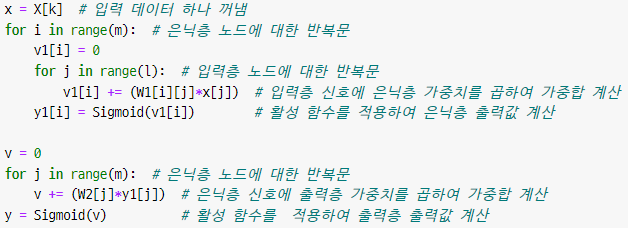</center>

- 델타 역전파 (backward propagation)

<center>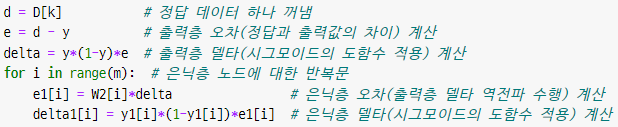</center>

- 가중치 조절 (weight update)

<center>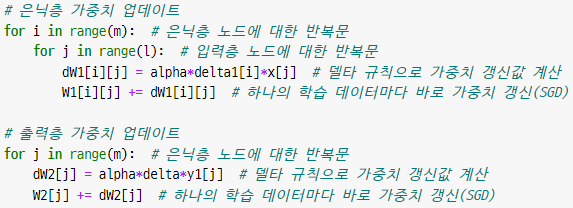</center>

- BackpropSGD(·) 실행

In [6]:
def BackpropSGD(W1, W2, X, D):
    alpha = 0.9     # 학습률(0~1)

    m = len(W1)     # 은닉층 가중치 행렬 W1의 행의 수 = 은닉층 노드 수
    l = len(W1[0])  # 은닉층 가중치 행렬 W1의 열의 수 = 입력층 노드 수

    v1     = [ 0 for j in range(m)]  # 은닉층 가중합 리스트 생성
    y1     = [ 0 for j in range(m)]  # 은닉층 출력값 리스트 생성
    e1     = [ 0 for j in range(m)]  # 은닉층 오차값 리스트 생성
    delta1 = [ 0 for j in range(m)]  # 은닉층 델타값 리스트 생성
    dW1    = [[0 for i in range(l)] for j in range(m)]  # 은닉층 가중치 갱신값 2차원 리스트(행렬) 생성
    dW2    = [ 0 for j in range(m)]  # 출력층 가중치 갱신값 리스트 생성

    for k in range(len(X)):

        # 신경망 출력(forward propagation)
        x = X[k]  # 입력 데이터 하나 꺼냄
        for i in range(m):  # 은닉층 노드에 대한 반복문
            v1[i] = 0
            for j in range(l):  # 입력층 노드에 대한 반복문
                v1[i] += (W1[i][j]*x[j])  # 입력층 신호에 은닉층 가중치를 곱하여 가중합 계산
            y1[i] = Sigmoid(v1[i])        # 활성 함수를 적용하여 은닉층 출력값 계산

        v = 0
        for j in range(m):  # 은닉층 노드에 대한 반복문
            v += (W2[j]*y1[j])  # 은닉층 신호에 출력층 가중치를 곱하여 가중합 계산
        y = Sigmoid(v)          # 활성 함수를  적용하여 출력층 출력값 계산

        # 델타 역전파(backward propagation)
        d = D[k]           # 정답 데이터 하나 꺼냄
        e = d - y          # 출력층 오차(정답과 출력값의 차이) 계산
        delta = y*(1-y)*e  # 출력층 델타(시그모이드의 도함수 적용) 계산
        for i in range(m):  # 은닉층 노드에 대한 반복문
            e1[i] = W2[i]*delta                # 은닉층 오차(출력층 델타 역전파 수행) 계산
            delta1[i] = y1[i]*(1-y1[i])*e1[i]  # 은닉층 델타(시그모이드의 도함수 적용) 계산

        # 은닉층 가중치 조절(hidden layer weight update)
        for i in range(m):  # 은닉층 노드에 대한 반복문
            for j in range(l):  # 입력층 노드에 대한 반복문
                dW1[i][j] = alpha*delta1[i]*x[j]  # 델타 규칙으로 가중치 갱신값 계산
                W1[i][j] += dW1[i][j]  # 하나의 학습 데이터마다 바로 가중치 갱신(SGD)

        # 출력층 가중치 조절(output layer weight update)
        for j in range(m):  # 은닉층 노드에 대한 반복문
            dW2[j] = alpha*delta*y1[j]  # 델타 규칙으로 가중치 갱신값 계산
            W2[j] += dW2[j]  # 하나의 학습 데이터마다 바로 가중치 갱신(SGD)

    return W1, W2

■ BackpropSGD(·) 호출 방식으로 10000 epoch 반복 학습 수행

In [7]:
for epoch in range(10000):
    W1, W2 = BackpropSGD(W1, W2, X, D)

■ 학습 결과 확인

- 신경망의 출력값을 정답$\left( D = \begin{bmatrix} 0 & 1 & 1 & 0 \end{bmatrix}^T \right)$과 비교

In [8]:
for k in range(len(X)):
    x = X[k]  # 입력 데이터 하나 꺼냄
    for i in range(m):  # 은닉층 노드에 대한 반복문
        v1[i] = 0
        for j in range(l):  # 입력층 노드에 대한 반복문
            v1[i] += (W1[i][j]*x[j])  # 입력층 신호에 은닉층 가중치를 곱하여 가중합 계산
        y1[i] = Sigmoid(v1[i])        # 활성 함수를 적용하여 은닉층 출력값 계산

    v = 0
    for j in range(m):  # 은닉층 노드에 대한 반복문
        v += (W2[j]*y1[j])  # 은닉층 신호에 출력층 가중치를 곱하여 가중합 계산
    y = Sigmoid(v)          # 활성 함수를  적용하여 신경망(출력층) 출력값 계산

    print(y)  # 출력값 print

0.006595055397241246
0.986233984967254
0.9878299745509225
0.015358938457338584


### 비용함수
<br>

■ 최적화 문제

$$
\begin{align}
\text{Find} \quad
&\mathbf{x^{*}} = \underset{\mathbf{x} \in \mathbb{D}}{\text{argmin}} f(\mathbf{x}) \\
\text{subject to} \quad
&g_i(\mathbf{x}) \le 0, \; i = 1, \cdots, m \; (m \ge 0) \\
&h_j(\mathbf{x}) = 0, \; j = 1, \cdots, n \; (n \ge 0)
\end{align}
\tag{3.15}
$$

- $f(\mathbf{x})$ : 비용함수$^\text{cost function}$(목적함수$^\text{objective function}$)
- $g(\mathbf{x})$, $h(\mathbf{x})$ : 구속조건$^\text{constraints}$
- $\mathbf{x}$ : 설계 변수$^\text{design variable}$
- $\mathbf{x^{*}}$ : 최적 해$^\text{optimal solution}$
<br>

&nbsp;&nbsp;&nbsp;&nbsp;→ 구속조건을 만족하면서 <font color='blue'>**$f(\mathbf{x})$를 최소화하는 $\mathbf{x^{*}}$**</font>를 구하라

&nbsp;&nbsp;신경망의 지도 학습은<br>
&nbsp;&nbsp;<font color='blue'>"**출력층 오차를 최소화하는 연결가중치**"</font><br>
&nbsp;&nbsp;를 구하는 최적화 문제

&nbsp;&nbsp;이때,
- 설계 변수는 연결가중치 : $w_{ij}$
<br><br>
- 비용함수는 출력층 오차의 제곱합(모든 학습 데이터가<br>
  적용된 것으로 가정) :
$$
\sum_{n=1}^{N}{\frac{1}{2} e_n(w_{ij})^2} = \sum_{n=1}^{N}{\frac{1}{2} \{d_n - y_n(w_{ij})\}^{2}}
\tag{3.16}
$$
<br>
- 구속조건은 없음 : 비제약 최적화$^\text{unconstrained optimization}$ 문제

&nbsp;&nbsp;따라서, 신경망의 지도 학습은<br>
&nbsp;&nbsp;다음의 비제약 최적화 문제로 정식화<br>
<br>

$$
\text{Find} \;
w_{ij}^{*} = \underset{w_{ij} \in \mathbb{D}}{\text{argmin}} \left( \sum_{n=1}^{N}{\frac{1}{2} \{d_n - y_n(w_{ij})\}^2} \right) \\
\tag{3.17}
$$

- 본 최적화 문제에 대해 최적화 알고리즘으로 설계 변수를<br>
  변경시키면서 비용함수를 줄여 최적 해를 찾아가는 과정이,

<br>

- 다층 신경망에서 역전파 기반 델타 규칙으로 연결 가중치를<br>
  조절하면서 출력층 오차를 줄여 학습을 수행하는 과정으로<br>
  구현된 것임

- 최적화 문제에서 경사하강법 등 최적화기법으로 설계변수를<br>
  변경시키면서 비용함수를 줄여 최적 해를 찾아가는 과정

$$
\mathbf{x}
\leftarrow \mathbf{x} + \boldsymbol{\Delta} \mathbf{x}, \quad
\boldsymbol{\Delta} \mathbf{x}
= \alpha \, \Big[ -\frac{\partial f}{\partial \mathbf{x}} \Big]
$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$-\partial f / \partial \mathbf{x}$ : 비용함수의 최대 경사하강 방향(음의 구배$^\text{gradient}$)

<br>

- 다층 신경망에서 역전파 기반 델타 규칙으로 연결 가중치를<br>
  조절하면서 출력층 오차를 줄여 학습을 수행하는 과정

$$
\mathbf{W}
\leftarrow \mathbf{W} + \boldsymbol{\Delta} \mathbf{W}, \quad
\boldsymbol{\Delta} \mathbf{W}
= \alpha \, \big[ \boldsymbol{\delta} \, \mathbf{y^{T}} \big]
$$


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\boldsymbol{\delta} \, \mathbf{y^{T}}$ : 출력층 오차의 최대 경사하강 방향(음의 구배에 해당)

■ 기존 비용함수 : 오차의 제곱합$^\text{sum of squared error}$

$$\sum_{n=1}^{N}{\frac{1}{2} (d_n - y_n)^{2}} \tag{3.18}$$

- 오차의 제곱 $\text{SE} = \frac{1}{2} (d - y)^{2}$

  - 신경망 출력$(y)$이 정답$(d)$와 같으면 0

  - 두 값의 차이가 커지면 제곱의 비율로 커짐

<br>

- 신경망 연구 초기에 사용했고, 회귀 문제는 여전히 사용

- 오차의 제곱을 그려보면,

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def PlotSE(np, plt):
    e = np.linspace(-3, 3, 100)
    plt.figure(figsize=(10, 6))
    plt.plot(e, 0.5*e**2, label='SE = ½(d-y)²')
    plt.xlabel('d-y')
    plt.ylabel('SE (squared error)')
    plt.axhline(0.0, color='grey', ls='--')
    plt.axvline(0.0, color='grey', ls='--')
    plt.axis('equal')
    plt.legend()
    plt.show()

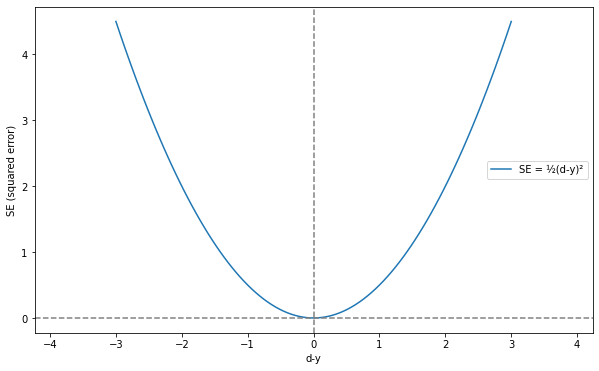

In [10]:
PlotSE(np, plt)

■ 새로운 비용함수 : 교차 엔트로피$^\text{cross entropy}$ 합

$$
\sum_{n=1}^{N}{ \{-d_{n} \ln(y_{n}) - (1 - d_{n}) \ln(1 - y_{n}) \} }
\tag{3.19}
$$

<br>

- 교차 엔트로피

$$\text{CE} = -d \ln(y) - (1 - d) \ln(1 - y)$$



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;무슨 말?????

- $d$에 따라 두 식으로 풀어 쓰면

$$
\begin{align}
\text{CE} &=
-d \ln(y) - (1 - d) \ln(1 - y) \\[1.5ex] &=
\begin{cases}
-\ln(y) &(d = 1) \\[1ex]
-\ln(1 - y) &(d = 0)
\end{cases}
\end{align}
\tag{3.20}
$$

- 비용함수로서 교차 엔트로피는

  - 신경망 출력이 $0 < y < 1$이고 $\bigl( \because \ln(y), \; \ln(1-y) \bigl)$

  - 정답 $d$가 $d = 0 \; \text{or} \; 1$인 분류 문제에 적용

- $d = 1$의 교차 엔트로피 $\text{CE} = -\ln(y)$를 그려보면,

In [11]:
def PlotCE1(np, plt):
    y = np.linspace(0.00001, 1, 1000)
    plt.figure(figsize=(10, 6))
    plt.plot(y, -np.log(y), label='CE = -ln(y),     d = 1')
    plt.xlabel('y')
    plt.ylabel('CE (cross entropy)')
    plt.axhline(0.0, color='grey', ls='--')
    plt.axvline(0.0, color='grey', ls='--')
    plt.axvline(1.0, color='grey', ls='--')
    plt.legend()
    plt.show()

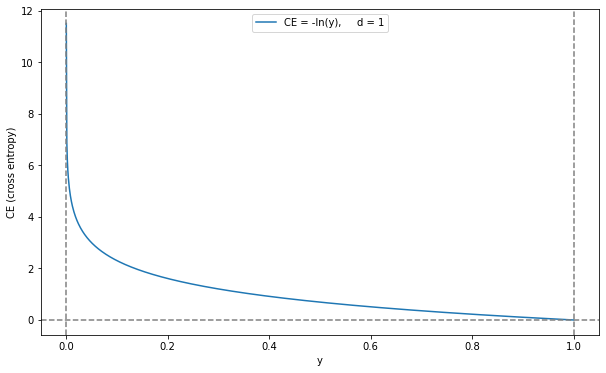

In [12]:
PlotCE1(np, plt)

- $d = 0$의 교차 엔트로피 $\text{CE} = -\ln(1-y)$를 그려보면,

In [13]:
def PlotCE0(np, plt):
    y = np.linspace(0, 0.99999, 1000)
    plt.figure(figsize=(10, 6))
    plt.plot(y, -np.log(1-y), label='CE = -ln(1-y),     d = 0')
    plt.xlabel('y')
    plt.ylabel('CE (cross entropy)')
    plt.axhline(0.0, color='grey', ls='--')
    plt.axvline(0.0, color='grey', ls='--')
    plt.axvline(1.0, color='grey', ls='--')
    plt.legend()
    plt.show()

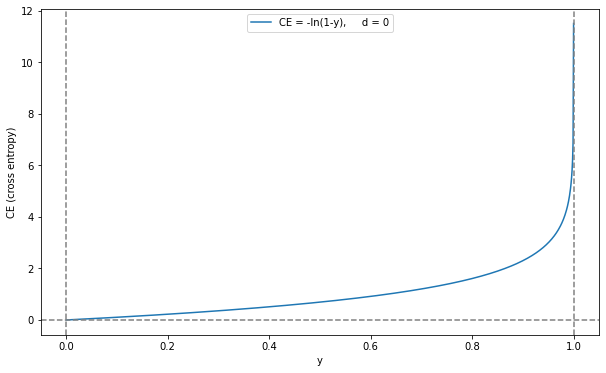

In [14]:
PlotCE0(np, plt)

- 왼쪽$(d = 1)$의 교차 엔트로피는
  - 신경망 출력$(y)$이 정답$(d = 1)$과 같으면 0
  - 두 값의 차이가 커지면$(y \rightarrow 0)$ 급격히 증가

- 오른쪽$(d = 0)$의 교차 엔트로피도
  - 신경망 출력$(y)$이 정답$(d = 0)$과 같으면 0
  - 두 값의 차이가 커지면$(y \rightarrow 1)$ 급격히 증가

- $d = 1$일 때, 교차 엔트로피와 오차의 제곱을 같이 그려보면,

In [15]:
def PlotCE1SE1(np, plt):
    y = np.linspace(0.00001, 1, 1000)
    plt.figure(figsize=(10, 6))
    plt.plot(y, -np.log(y), label='CE = -ln(y),     d = 1')
    plt.plot(y, 0.5*(1-y)**2, label='SE = ½(d-y)²,  d = 1')
    plt.xlabel('y')
    plt.ylabel('CE & SE')
    plt.axhline(0.0, color='grey', ls='--')
    plt.axvline(0.0, color='grey', ls='--')
    plt.axvline(1.0, color='grey', ls='--')
    plt.legend()
    plt.show()

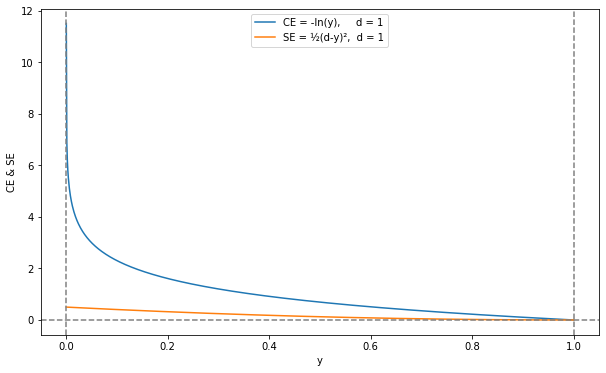

In [16]:
PlotCE1SE1(np, plt)

- $d = 0$일 때, 교차 엔트로피와 오차의 제곱을 같이 그려보면,

In [17]:
def PlotCE0SE0(np, plt):
    y = np.linspace(0, 0.99999, 1000)
    plt.figure(figsize=(10, 6))
    plt.plot(y, -np.log(1-y), label='CE = -ln(1-y),     d = 0')
    plt.plot(y, 0.5*(0-y)**2, label='SE = ½(d-y)²,  d = 0')
    plt.xlabel('y')
    plt.ylabel('CE & SE')
    plt.axhline(0.0, color='grey', ls='--')
    plt.axvline(0.0, color='grey', ls='--')
    plt.axvline(1.0, color='grey', ls='--')
    plt.legend()
    plt.show()

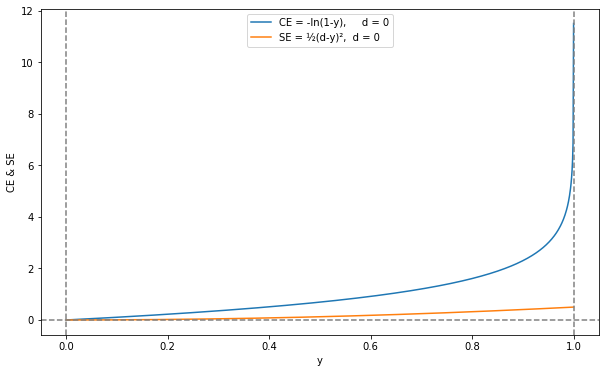

In [18]:
PlotCE0SE0(np, plt)

- 교차 엔트로피
  - 오차가 크면 급격한 경사 : 오차가 빨리 줄도록 유도
  - 오차가 작으면 완만한 경사 : 안정적 수렴 성능 확보

- 오차의 제곱은 상대적으로 학습 성능이 떨어짐

- 출력$(y)$이 0~1(소속 확률), 정답$(d)$이 0(범주A)/1(범주B)인<br>
  분류 문제는 반드시 교차 엔트로피로 구현한 비용함수 적용

- 비용함수가 변경되면 역전파 알고리즘의 수식도 변경됨

- 오차의 제곱 대신 교차엔트로피를 적용하면 다음과 같이<br>
  딱 한 부분만 역전파 알고리즘이 수정됨

$
\begin{align}
&\text{Squared Error} \\\\
\mathbf{e^{(k)}} &=
\begin{cases}
\mathbf{d} - \mathbf{y} \\
\mathbf{{W^{(k+1)}}^{T}} \boldsymbol{\delta^{(\mathbf{k}+1)}}
\end{cases} \\
\boldsymbol{\delta^{(\mathbf{k})}} &= \boldsymbol{\varphi}'(\mathbf{v^{(k)}}) \circ \mathbf{e^{(k)}} \\
\mathbf{W^{(k)}} &\leftarrow \mathbf{W^{(k)}} + \alpha \, \boldsymbol{\delta^{(\mathbf{k})}} \, \mathbf{{y^{(k-1)}}^{T}}
\end{align}
\quad \quad
$
$
\begin{align}
&\text{Cross Entropy} \\
\mathbf{e^{(k)}} &=
\begin{cases}
\mathbf{d} - \mathbf{y} \\
\mathbf{{W^{(k+1)}}^{T}} \boldsymbol{\delta^{(\mathbf{k}+1)}}
\end{cases} \\
\boldsymbol{\delta^{(\mathbf{k})}} &=
\begin{cases}
\mathbf{\color{Blue}e^{\color{Blue}(\color{Blue}k\color{Blue})}} \\
\boldsymbol{\varphi}'(\mathbf{v^{(k)}}) \circ \mathbf{e^{(k)}}
\end{cases} \\
\mathbf{W^{(k)}} &\leftarrow \mathbf{W^{(k)}} + \alpha \, \boldsymbol{\delta^{(\mathbf{k})}} \, \mathbf{{y^{(k-1)}}^{T}}
\end{align}
$

&nbsp;&nbsp;- 출력층 델타를 구할 때 에러를<br>
&nbsp;&nbsp;&nbsp;&nbsp;바로 사용(도함수 안 곱함)
<br><br>
$$\delta = \varphi'(v) \, e \; \longrightarrow \; \delta = e$$

- 출력층에서 코딩이 오히려 간편해짐

<br>

- 겉으로는 사소한 차이지만, 속을 들여다 보면<br>
  비용함수 차이에 따른 최적화 알고리즘의 변화라는<br>
  최적화 이론에 기반한 심오한 이론이 숨겨져 있음

■ 교차엔트로피 기반 역전파알고리즘 지도학습

&nbsp;&nbsp;1. 신경망의 가중치를 적당한 값으로 초기화

&nbsp;&nbsp;2. 학습 데이터 {입력, 정답}에서 '입력'을<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;신경망에 입력해 출력$(\mathbf{y})$을 얻고, 해당<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;'정답$(\mathbf{d})$'과 비교해 오차$(\mathbf{e^{(n)}}=\mathbf{d}-\mathbf{y})$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;구하고 델타<font color='blue'>$(\boldsymbol{\delta^{(\mathbf{n})}} = \mathbf{e^{(n)}})$</font>를 계산

&nbsp;&nbsp;3. 델타를 역전파시켜 바로 아래 은닉층 노드들의 델타 계산<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$(\mathbf{e^{(k)}} = \mathbf{{W^{(k+1)}}^{T}} \boldsymbol{\delta^{(\mathbf{k}+1)}}, \;\;
\boldsymbol{\delta^{(\mathbf{k})}} = \boldsymbol{\varphi}'(\mathbf{v^{(k)}}) \circ \mathbf{e^{(k)}})$<br>
&nbsp;&nbsp;4. 단계 3을 입력층 바로 위까지 모든 은닉층에 차례로 반복<br>

&nbsp;&nbsp;5. 델타 규칙으로 가중치 조절$(\mathbf{W^{(k)}} \leftarrow \mathbf{W^{(k)}} + \alpha \boldsymbol{\delta^{(\mathbf{k})}} \mathbf{{y^{(k-1)}}^{T}})$<br>

&nbsp;&nbsp;6. 전체 학습 데이터에 대해 2\~5를 반복<br>
&nbsp;&nbsp;7. 신경망의 출력 오차가 충분히 줄어들 때까지 2\~6을 반복

### 교차 엔트로피 알고리즘 구현
&nbsp;&nbsp;- 앞의 예제와 동일한 XOR 문제

<br>

■ 3개의 입력 노드와 1개의 출력 노드 및<br>
&nbsp;&nbsp;4개의 은닉 노드가 있는 은닉층 1개로<br>
&nbsp;&nbsp;구성된 신경망

- 먼저 난수 시드 생성

In [19]:
rd.seed(777)  # 실행 결과의 재현성 확보

- 은닉층 자료구조 셋업

In [20]:
l =  3 # 입력층 노드 수
m =  4 # 은닉층 노드 수
W1 = [[0 for i in range(l)] for j in range(m)]  # 은닉층 가중치 2차원 리스트(행렬) 생성
v1 = [ 0 for j in range(m)]  # 은닉층 가중합 리스트 생성
y1 = [ 0 for j in range(m)]  # 은닉층 출력값 리스트 생성
for i in range(m):
    for j in range(l):
        W1[i][j] = rd.random()  # 0~1 난수로 가중치 초기화
W1, v1, y1

([[0.22933408950153078, 0.44559617334521107, 0.36859824937216046],
  [0.269835098321503, 0.3361436466700177, 0.7523163560031157],
  [0.9226950812763804, 0.9122532879410743, 0.6222433339601738],
  [0.3895915642491937, 0.28896643129516897, 0.9931563744011908]],
 [0, 0, 0, 0],
 [0, 0, 0, 0])

- 출력층 자료구조 셋업

In [21]:
#n = 1 # 출력층 노드 수
W2 = [ 0 for j in range(m)]  # 출력층 가중치 리스트 생성
#v = 0
#y = 0
for j in range(m):
    W2[j] = rd.random()  # 0~1 난수로 가중치 초기화
W2

[0.9292201929855926,
 0.6919591432659481,
 0.8881824637439067,
 0.10358232898131614]

■ 학습 데이터는 총 4개

- 지도 학습용으로 {입력, 정답}의 쌍
- 굵은 글씨로 표시된 마지막 숫자가 '정답'

In [22]:
# 입력 데이터와 정답 데이터를 따로 준비
X = [[0, 0, 1],
     [0, 1, 1],
     [1, 0, 1],
     [1, 1, 1]]
D = [0,
     1, # 네 번째 정답과 바뀜
     1,
     0] # 두 번째 정답과 바뀜
X, D

([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]], [0, 1, 1, 0])

■ 은닉·출력층 활성함수는 시그모이드 함수

- 람다 함수 적용으로 학습 속도 향상

In [23]:
Sigmoid = lambda x: 1/(1. + (2.7182818284)**(-x))

■ BackpropSgdCE(·)<br>
&nbsp;&nbsp;: 교차 엔트로피 역전파 기반 델타 규칙에 따른 SGD 수행

- 신경망의 가중치와 학습 데이터를 인자로 넘겨 받아<br>
  새롭게 학습된 가중치를 반환하는 방식으로 실행
<br><br>
<center>W1, W2 = BackpropSgdCE(W1, W2, X, D)</center>

- 델타 역전파 (backward propagation)

<center>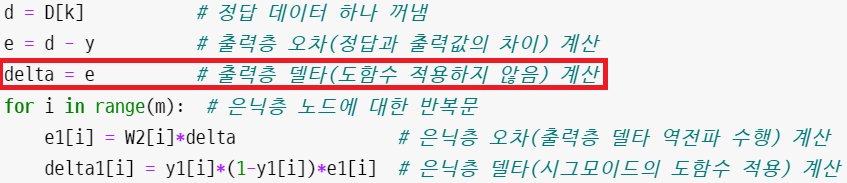</center>

- BackpropSgdCE(·) 실행

In [24]:
def BackpropSgdCE(W1, W2, X, D):
    alpha = 0.9     # 학습률(0~1)

    m = len(W1)     # 은닉층 가중치 행렬 W1의 행의 수 = 은닉층 노드 수
    l = len(W1[0])  # 은닉층 가중치 행렬 W1의 열의 수 = 입력층 노드 수

    v1     = [ 0 for j in range(m)]  # 은닉층 가중합 리스트 생성
    y1     = [ 0 for j in range(m)]  # 은닉층 출력값 리스트 생성
    e1     = [ 0 for j in range(m)]  # 은닉층 오차값 리스트 생성
    delta1 = [ 0 for j in range(m)]  # 은닉층 델타값 리스트 생성
    dW1    = [[0 for i in range(l)] for j in range(m)]  # 은닉층 가중치 갱신값 2차원 리스트(행렬) 생성
    dW2    = [ 0 for j in range(m)]  # 출력층 가중치 갱신값 리스트 생성

    for k in range(len(X)):

        # 신경망 출력(forward propagation)
        x = X[k]  # 입력 데이터 하나 꺼냄
        for i in range(m):  # 은닉층 노드에 대한 반복문
            v1[i] = 0
            for j in range(l):  # 입력층 노드에 대한 반복문
                v1[i] += (W1[i][j]*x[j])  # 입력층 신호에 은닉층 가중치를 곱하여 가중합 계산
            y1[i] = Sigmoid(v1[i])        # 활성 함수를 적용하여 은닉층 출력값 계산

        v = 0
        for j in range(m):  # 은닉층 노드에 대한 반복문
            v += (W2[j]*y1[j])  # 은닉층 신호에 출력층 가중치를 곱하여 가중합 계산
        y = Sigmoid(v)          # 활성 함수를  적용하여 출력층 출력값 계산

        # 델타 역전파(backward propagation)
        d = D[k]           # 정답 데이터 하나 꺼냄
        e = d - y          # 출력층 오차(정답과 출력값의 차이) 계산
        delta = e          # 출력층 델타(도함수 적용하지 않음) 계산
        for i in range(m):  # 은닉층 노드에 대한 반복문
            e1[i] = W2[i]*delta                # 은닉층 오차(출력층 델타 역전파 수행) 계산
            delta1[i] = y1[i]*(1-y1[i])*e1[i]  # 은닉층 델타(시그모이드의 도함수 적용) 계산

        # 은닉층 가중치 조절(hidden layer weight update)
        for i in range(m):  # 은닉층 노드에 대한 반복문
            for j in range(l):  # 입력층 노드에 대한 반복문
                dW1[i][j] = alpha*delta1[i]*x[j]  # 델타 규칙으로 가중치 갱신값 계산
                W1[i][j] += dW1[i][j]  # 하나의 학습 데이터마다 바로 가중치 갱신(SGD)

        # 출력층 가중치 조절(output layer weight update)
        for j in range(m):  # 은닉층 노드에 대한 반복문
            dW2[j] = alpha*delta*y1[j]  # 델타 규칙으로 가중치 갱신값 계산
            W2[j] += dW2[j]  # 하나의 학습 데이터마다 바로 가중치 갱신(SGD)

    return W1, W2

■ BackpropSgdCE(·) 호출 방식으로 10000 epoch 반복 학습 수행

In [25]:
for epoch in range(10000):
    W1, W2 = BackpropSgdCE(W1, W2, X, D)

■ 학습 결과 확인

- 신경망의 출력값을 정답$\left( D = \begin{bmatrix} 0 & 1 & 1 & 0 \end{bmatrix}^T \right)$과 비교

In [26]:
for k in range(len(X)):
    x = X[k]  # 입력 데이터 하나 꺼냄
    for i in range(m):  # 은닉층 노드에 대한 반복문
        v1[i] = 0
        for j in range(l):  # 입력층 노드에 대한 반복문
            v1[i] += (W1[i][j]*x[j])  # 입력층 신호에 은닉층 가중치를 곱하여 가중합 계산
        y1[i] = Sigmoid(v1[i])        # 활성 함수를 적용하여 은닉층 출력값 계산

    v = 0
    for j in range(m):  # 은닉층 노드에 대한 반복문
        v += (W2[j]*y1[j])  # 은닉층 신호에 출력층 가중치를 곱하여 가중합 계산
    y = Sigmoid(v)          # 활성 함수를  적용하여 신경망(출력층) 출력값 계산

    print(y)  # 출력값 print

2.9422180913328654e-05
0.9999175357991327
0.9997577711470935
0.0003651064631759981


<figure>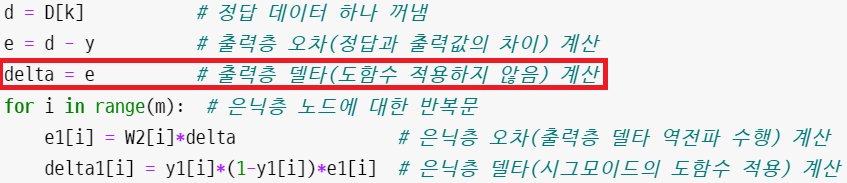</figure>

■ 이전의 BackpropSGD(·)와<br>
&nbsp;&nbsp;BackpropSgdCE(·)의 차이는<br>
&nbsp;&nbsp;출력 노드의 델타 계산하는<br>
&nbsp;&nbsp;부분말고는 없음

- 이와 같은  사소한 차이가 학습 성능에 어떠한 영향을<br>
  주는지 비교함
- BackpropSGD(·)와 BackpropSgdCE(·) 함수를 호출하여<br>
  각 신경망을 1000 epoch동안 반복 학습

- 전체 데이터에 대한 학습이 한 번 완료된 시점 기준으로<br>
  즉, 각 epoch마다 두 신경망에 학습 데이터를 입력하여<br>
  출력 오차의 제곱합에 대한 평균을 계산

- 공정한 비교를 위해 신경망의 가중치를 동일하게 초기화

In [27]:
rd.seed(777)  # 실행 결과의 재현성 확보

In [28]:
l =  3 # 입력층 노드 수
m =  4 # 은닉층 노드 수

# Cross entropy
W11 = [[0 for i in range(l)] for j in range(m)]  # 은닉층 가중치 2차원 리스트(행렬) 생성
W12 = [ 0 for j in range(m)]  # 출력층 가중치 리스트 생성

# Squared error
W21 = [[0 for i in range(l)] for j in range(m)]  # 은닉층 가중치 2차원 리스트(행렬) 생성
W22 = [ 0 for j in range(m)]  # 출력층 가중치 리스트 생성

v1  = [ 0 for j in range(m)]  # 은닉층 가중합 리스트 생성
y1  = [ 0 for j in range(m)]  # 은닉층 출력값 리스트 생성

for i in range(m):
    for j in range(l):
        W11[i][j] = rd.uniform(-1, 1)   # -1~1 난수로 가중치 초기화
        W21[i][j] = W11[i][j]           # 같은 값으로 가중치 초기화

for j in range(m):
    W12[j] = rd.uniform(-1, 1)  # -1~1 난수로 가중치 초기화
    W22[j] = W12[j]             # 같은 값으로 가중치 초기화

In [29]:
E1 = [0]*1000; E2 = [0]*1000  # 1000개 epoch에 대한 오차값 리스트 생성
for epoch in range(1000):
    W11, W12 = BackpropSgdCE(W11, W12, X, D)  # 교차 엔트로피 방식으로 학습 수행
    W21, W22 = BackpropSGD(W21, W22, X, D)    # 오차의 제곱 방식으로 학습 수행
    es1 = 0; es2 = 0
    for k in range(len(X)):
        x = X[k]; d = D[k]
        for i in range(m):
            v1[i] = 0
            for j in range(l):
                v1[i] += (W11[i][j]*x[j])  # 입력층 신호에 대한 가중합 계산
            y1[i] = Sigmoid(v1[i])         # 활성 함수를 적용하여 은닉층 출력값 계산
        v = 0
        for j in range(m):
            v += (W12[j]*y1[j])  # 은닉층 신호에 대한 가중합 계산
        y = Sigmoid(v)           # 활성 함수를 적용하여 신경망 출력값 계산
        es1 += (d - y)**2        # 정답과 출력값 차이의 제곱합 계산
        for i in range(m):
            v1[i] = 0
            for j in range(l):
                v1[i] += (W21[i][j]*x[j])  # 입력층 신호에 대한 가중합 계산
            y1[i] = Sigmoid(v1[i])         # 활성 함수를 적용하여 은닉층 출력값 계산
        v = 0
        for j in range(m):
            v += (W22[j]*y1[j])  # 은닉층 신호에 대한 가중합 계산
        y = Sigmoid(v)           # 활성 함수를 적용하여 신경망 출력값 계산
        es2 += (d - y)**2        # 정답과 출력값 차이의 제곱합 계산
    E1[epoch] = es1/len(X); E2[epoch] = es2/len(X)  # 출력 오차의 제곱합에 대한 평균 계산

■ BackpropSGD(·)와 BackpropSgdCE(·)의 학습 이력 시각화

In [30]:
def PlotSEvsCE(plt):
    plt.plot(E1, 'r', label = 'Cross Entropy')
    plt.plot(E2, 'b--', label = 'Squared Error')
    plt.legend()
    plt.grid(linestyle=':')
    plt.title('Cross Entropy vs Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('Average of Training Error')
    plt.xlim(0, 1000)
    plt.ylim(0, 0.25)
    plt.show()

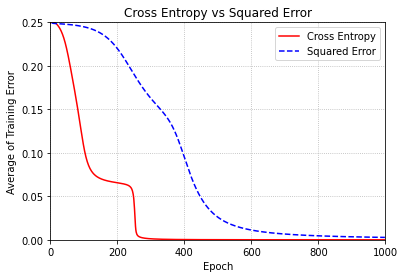

In [31]:
PlotSEvsCE(plt)